# Simulations of scattering event according to original dynamics

In [1]:
using Plots
using CSV
using DataFrames

include("functions.jl")
using .TwoBodyScattering

In [35]:
#Define parameters for simulations

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(120);
v0::Float64 = 50.0;

In [36]:
#Define required vectors and variables for saving results

total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq = range(-pi, pi, total_N);
phi2seq = range(-pi, pi, total_N);
deltaps = Float64[];
dinit = Float64[];

# Simulate the scattering events and save outgoing angle

generate!(dinit, deltaps,
        dphi,
        gamma, v0, int_range, 0.0,
        dtf);

UndefVarError: UndefVarError: `dtf` not defined

In [ ]:
#Run simulations at fixed v_0 for different values of dissipation

#Variables for simulation
total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq::Vector{Float64} = range(-pi, pi, total_N);
phi2seq::Vector{Float64} = range(-pi, pi, total_N);
deltaps::Vector{Float64} = Float64[];
thetatot::Vector{Float64} = Float64[];
dinit::Vector{Float64} = Float64[];
dt::Float64 = 0.0001;

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(120);
v0::Float64 = 100.0;

print("Chosen parameters (micrometers): ", "\n",
        "Permittivity: ", permit, "\n",
        "Maximum value of dissipation: ", diss_max, "\n",
        "Intensity of rot. interactions: ", gamma, "\n")

#Ranges of values for dissipation intensity
cranges = vcat(100:100:4000,5000:1000:diss_max);
#Vector of averaged of pdp
avgpdps::Vector{Float64} = Vector{Float64}(undef, length(cranges)+1);

#Colours palette
palettes = range(colorant"red", stop=colorant"green", length=length(cranges));

#Generate first plot

generate!(dinit, thetatot, deltaps,
        dphi,
        gamma, v0, int_range, 0.0,
        0.0001);
rangex = -(pi):dphi:(pi-dphi);
avgpdp = zeros(length(rangex));
totn = zeros(length(rangex));
for x in 1:length(rangex)
    for i in 1:length(dinit)
        if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
            avgpdp[x]+=deltaps[i];
            totn[x]+=1;
        end
    end
end
avgpdp = avgpdp./totn;
v = abs.(sin.(rangex./2)).*avgpdp;
avgpdps[1] = dphi*sum(vcat(v[2:Int((length(rangex)+1)/2)],v[Int((length(rangex)+1)/2)+2:end]));

# p = plot(rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[1], legend=false)
# xlabel!(p, "Delta")
# ylabel!(p, "pdp")

#Generate plots for all ranges of intensities

@inbounds for i in 1:length(cranges)

    # if i == 1
    #     dt = 0.001;
    # elseif i == 20
    #     dt = 0.0015;
    # elseif i == 35
    #     dt = 0.002;
    # elseif i == 42
    #     dt = 0.003;
    # elseif i == 48
    #     dt = 0.004;
    # elseif i == 53
    #     dt = 0.005;
    # end
    fill!(deltaps, 0);
    fill(dinit, 0);
    print(i," ",dt," ",cranges[i], "\n")
    generate!(dinit, thetatot, deltaps,
        dphi,
        gamma, v0, int_range, cranges[i],
        dt);
    
    avgpdp = zeros(length(rangex));
    totn = zeros(length(rangex));
    for x in 1:length(rangex)
        for i in 1:length(dinit)
            if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
                avgpdp[x]+=deltaps[i];
                totn[x]+=1;
            end
        end
    end
    avgpdp = avgpdp./totn;
    vs = abs.(sin.(rangex./2)).*avgpdp;
    avgpdps[i+1] = dphi*sum(vcat(vs[2:Int((length(rangex)+1)/2)],vs[Int((length(rangex)+1)/2)+2:end]));

    # plot!(p, rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[i])
end

In [ ]:
#Plot final result
p
#savefig("pdpv0100VaringDissfrom0to1.pdf")

In [8]:
#Plot dependence of average of pdp on repulsion force

#Multiply by rate-involved factors
#avgpdps = avgpdps.*(1/(2*pi)*2*20*0.1*100);
#Save to file
drag = 25*1e-9;
CSV.write("/Users/ciarchi/Desktop/Acadm/MPI/Alignwithsplay/Code/scatteringantialign/avgpdp.csv", DataFrame(C=drag.*vcat([0],cranges),Avgpdp = avgpdps))


#Plot
# scatter(vcat([0],cranges)[1:45], avgpdps[1:45], color=:black, grid = false, legend = false)
# hline!([0,0], style=:dash)
# xlabel!("Dissipation Strength")
# ylabel!("Average of pdp")
#savefig("pdpvStrength.pdf")

"/Users/ciarchi/Desktop/Acadm/MPI/Alignwithsplay/Code/scatteringantialign/avgpdp.csv"

In [32]:
#Plot movies of single scattering events
phi10::Float64 = +1.5;
phi20::Float64 = -pi/2;

pdp, phi1t, phi2t, a11, a22 = TwoBodyScattering.scatteringmovie(phi10, phi20, 1/120, 0.001, gamma, 100.0, 4000.0)
pdp, phi1t, phi2t, a11_1, a22_1 = TwoBodyScattering.scatteringmovie(phi10, phi20, 1/120, 0.01, gamma, 100.0, 20000.0)


lims = 30;
steps = 1;
animd = @animate for i in 1:steps:length(a11)
    plot(Tuple.(a11[i]), xlims=(-lims,lims+500), ylims=(-lims+lims/2,lims), legend = false)
    plot!(Tuple.(a22[i]))
end

animd_1 = @animate for i in 1:steps:length(a11_1)
    plot(Tuple.(a11_1[i]), xlims=(-lims,lims+500), ylims=(-lims+lims/2,lims), legend = false)
    plot!(Tuple.(a22_1[i]))
end

Animation("/var/folders/jn/hzpz5fjx36x_y2ydy2_b66sc0000gp/T/jl_AUxw0U", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png", "000021.png", "000022.png", "000023.png"])

In [ ]:
gif(animd_1, fps = 10)

## Average over different velocities and make phase diagram

In [2]:
#Variables for simulations
total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq::Vector{Float64} = range(-pi, pi, total_N);
phi2seq::Vector{Float64} = range(-pi, pi, total_N);
deltaps::Vector{Float64} = Float64[];
thetatot::Vector{Float64} = Float64[];
dinit::Vector{Float64} = Float64[];

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(120);

#Vectors for choices of velocities and savings of total averages of pdp
rangesv::Vector{Float64} = 1:2:100;
avgspdpv::Vector{Float64} = zeros(length(rangesv));
third_order::Vector{Float64} = zeros(length(rangesv));
dphis::Vector{Float64} = -(pi):dphi:(pi-dphi);

calc_avg!(avgspdpv, third_order,
        rangesv, dphis,
        gamma, diss_max, int_range,
        dphi)

Velocity: 1.0 with dt: 0.01
Velocity: 

3.0 with dt: 0.0033333333333333335


Velocity: 5.0 with dt: 0.002
Velocity: 

7.0 with dt: 0.0014285714285714286


Velocity: 9.0 with dt: 0.0011111111111111111
Velocity: 

11.0 with dt: 0.0009090909090909091


Velocity: 13.0 with dt: 0.0007692307692307692
Velocity: 

15.0 with dt: 0.0006666666666666666


Velocity: 17.0 with dt: 0.000588235294117647
Velocity: 

19.0 with dt: 0.0005263157894736842


Velocity: 21.0 with dt: 0.0004761904761904762
Velocity: 

23.0 with dt: 0.0004347826086956522


Velocity: 25.0 with dt: 0.0004
Velocity: 

27.0 with dt: 0.00037037037037037035


Velocity: 29.0 with dt: 0.0003448275862068965
Velocity: 

31.0 with dt: 0.0003225806451612903


Velocity: 33.0 with dt: 0.00030303030303030303
Velocity: 

35.0 with dt: 0.00028571428571428574


Velocity: 37.0 with dt: 0.0002702702702702703
Velocity: 

39.0 with dt: 0.0002564102564102564


Velocity: 41.0 with dt: 0.00024390243902439024
Velocity: 

43.0 with dt: 0.00023255813953488373


Velocity: 45.0 with dt: 0.00022222222222222223
Velocity: 

47.0 with dt: 0.0002127659574468085


Velocity: 49.0 with dt: 0.00020408163265306123
Velocity: 

51.0 with dt: 0.000196078431372549


Velocity: 53.0 with dt: 0.00018867924528301886
Velocity: 

55.0 with dt: 0.0001818181818181818


Velocity: 57.0 with dt: 0.00017543859649122806
Velocity: 

59.0 with dt: 0.00016949152542372882


Velocity: 61.0 with dt: 0.0001639344262295082
Velocity: 

63.0 with dt: 0.00015873015873015873


Velocity: 65.0 with dt: 0.00015384615384615385
Velocity: 

67.0 with dt: 0.00014925373134328358


Velocity: 69.0 with dt: 0.00014492753623188405
Velocity: 

71.0 with dt: 0.00014084507042253522


Velocity: 73.0 with dt: 0.000136986301369863
Velocity: 

75.0 with dt: 0.00013333333333333334


Velocity: 77.0 with dt: 0.00012987012987012987
Velocity: 

79.0 with dt: 0.00012658227848101267


Velocity: 81.0 with dt: 0.0001234567901234568
Velocity: 

83.0 with dt: 0.00012048192771084337


Velocity: 85.0 with dt: 0.00011764705882352942
Velocity: 

87.0 with dt: 0.00011494252873563218


Velocity: 89.0 with dt: 0.00011235955056179776
Velocity: 

91.0 with dt: 0.00010989010989010989


Velocity: 93.0 with dt: 0.00010752688172043011
Velocity: 

95.0 with dt: 0.00010526315789473685


Velocity: 97.0 with dt: 0.00010309278350515464
Velocity: 

99.0 with dt: 0.00010101010101010101


In [3]:
#Calculate whether flocking happens or not, by creating corresponding matrix

#Rotational diffusion contstant
Dr::Float64 = 0.15;
#Effective range of interactions
rangeLambda::Float64 = 20.0;
#Radius of particle
rparticle::Float64 = 1.5;
#Area of single particle
Ap::Float64 = pi*rparticle^2;

#Vectors to iterate over
afractions::Vector{Float64} = 0.01:0.02:0.26;
densities::Vector{Float64} = afractions.*1/Ap;
totalmus::Matrix{Float64} = zeros(length(rangesv), length(densities));
totalxis::Matrix{Float64} = zeros(length(rangesv), length(densities));
polarizations::Matrix{Float64} = zeros(length(rangesv), length(densities));



for i in 1:length(rangesv)
    for j in 1:length(densities)
        totalmus[i,j] = 1/(2*pi)*2*rangeLambda*densities[j]*rangesv[i]*avgspdpv[i]-Dr;
        totalxis[i,j] = 1/(2*pi)*2*rangeLambda*densities[j]*rangesv[i]*third_order[i];
        if totalmus[i,j] < 0
            polarizations[i,j] = 0;
        elseif totalmus[i,j] > 0 && totalxis[i,j] > 0
            polarizations[i,j] = sqrt(totalmus[i,j]/totalxis[i,j]);
        end
    end
end



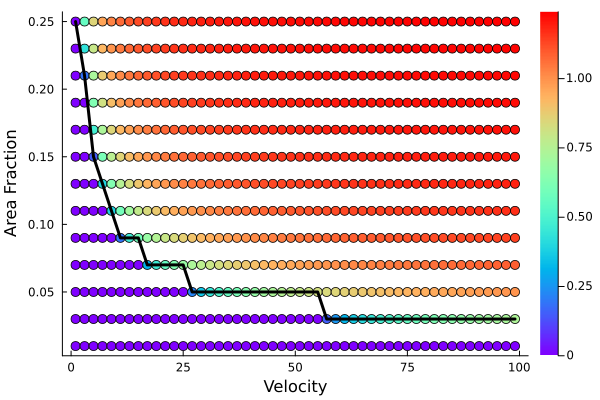

In [4]:
#Plot heatmap
z = transpose(polarizations)[:];
vtrans = zeros(length(afractions));
atrans = zeros(length(afractions));
y = repeat(afractions, length(afractions));
x = repeat(rangesv, inner = length(afractions));
negativeaf = zeros(length(rangesv));
for i in 1:length(rangesv)
    j::Int64 = 1;
    while polarizations[i,j] == 0
        j+=1;
        if j > length(afractions)
            j -= 1;
            break
        end
    end
    negativeaf[i] = afractions[j];
end

#Save transition of polarization
for i in 1:length(densities)
    for j in 1:length(rangesv)
        if polarizations[j,i] != 0
            atrans[i] = afractions[i];
            vtrans[i] = rangesv[j];
            break
        end
    end
end
scatter(x, y, zcolor = z, grid = false, markersize = 5, c=:rainbow1, legend = false, colorbar = true)
plot!(rangesv, negativeaf, color=:black, linewidth=3, legend = false)
xlabel!("Velocity")
ylabel!("Area Fraction")
#savefig("phasediagram.pdf")

In [8]:
#Save data for heatmap transition
df = DataFrame(v = vtrans, phi0 = atrans);
CSV.write("/Users/ciarchi/Desktop/Acadm/MPI/Alignwithsplay/Code/scatteringantialign/transitionarea.csv", df)

#Save data for heatmap
df = DataFrame(polarizations, string.(afractions));
df[!,"Velocity"] = rangesv;
CSV.write("/Users/ciarchi/Desktop/Acadm/MPI/Alignwithsplay/Code/scatteringantialign/heatmapphasediagram.csv", df)


"/Users/ciarchi/Desktop/Acadm/MPI/Alignwithsplay/Code/scatteringantialign/heatmapphasediagram.csv"

In [3]:
#TEST

#Variables for simulation
total_N::Int64 = 100;
dphi::Float64 = 2*pi/total_N;
phi1seq::Vector{Float64} = range(-pi, pi, total_N);
phi2seq::Vector{Float64} = range(-pi, pi, total_N);
deltaps::Vector{Float64} = Float64[];
thetatot::Vector{Float64} = Float64[];
dinit::Vector{Float64} = Float64[];
dt::Float64 = 0.001;

#Parameters taken from experimental values (in micrometers)
permit::Float64 = 6.95*1e-28;
diss_max::Float64 = 3/(4*pi*permit)*(9.76+4.64)^2*1e-32*(25*1e-9)^(-1);
gamma::Float64 = 3*0.56/(4*pi*permit)*(9.76^2-4.64^2)*1e-32*(75*1e-9)^(-1);
int_range::Float64 = 1.0/(120);
v0::Float64 = 100.0;

#Run over different initial conditions
generate!(dinit, thetatot, deltaps,
        dphi,
        gamma, v0, int_range, 20000.0,
        0.0001);